In [1]:
import os
import sys
import cv2
import random

import numpy as np
import geopandas as gdp
import matplotlib.pyplot as plt

sys.path.insert(0, '../')
from loaders.loaders import *

In [2]:
gdf = gdp.read_file(os.path.join('..', 'data', 'neighborhoods.geojson'))

pl = PanoramaLoader(os.path.join('..', 'data', '15000-water-images'), 
                                 filter_corrupt=True)

pl.set_option('read_method', cv2.imread)
pl.set_option('show_method', plt.imshow)

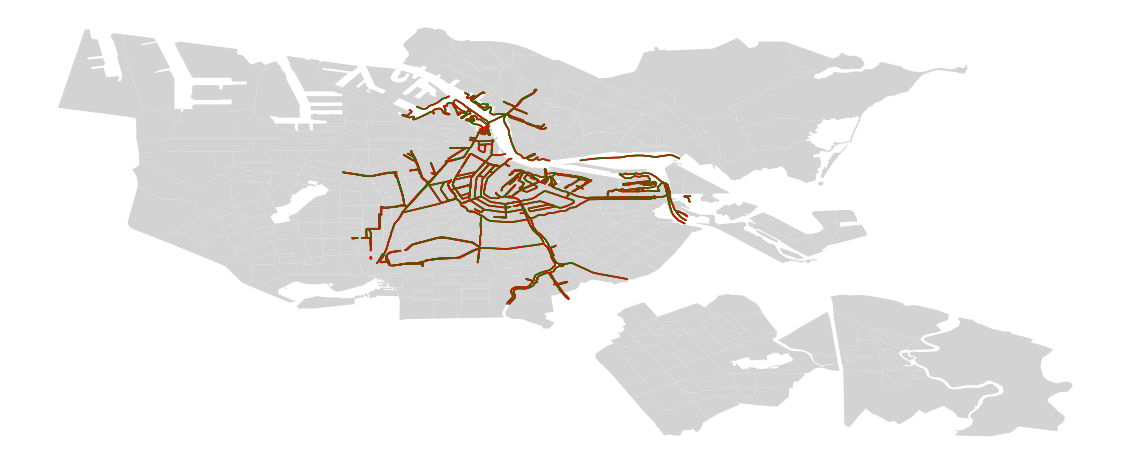

In [3]:
plt.rcParams["figure.figsize"] = (20,10)

ax = gdf.plot(color='lightgray')

coords = []
colors = []

for _, row in pl.all_metadata.iterrows():
    coords.append([row.lng, row.lat])
    colors.append(random.choice(['g', 'r']))

coords = np.array(coords)
ax.scatter(coords[:, 0], coords[:, 1], color=colors, s=.5)
plt.axis('off')
plt.show()

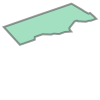

In [4]:
gdf['geometry'][0]

In [5]:
metadata = pd.DataFrame(os.listdir(os.path.join('..', 'data', 'fences-quays', 'images')), columns=['filename'])
print(len(os.listdir(os.path.join('..', 'data', 'fences-quays', 'images'))))

1339


In [6]:
def f(x):
    return f'{x[:-6]}{x[-4:]}'

metadata['filename_dump'] = metadata['filename'].apply(f)

In [7]:
def f(x):
    if '-r' in x:
        return 'right'
    elif '-l' in x:
        return 'left'

metadata['direction'] = metadata['filename'].apply(f)

In [8]:
metadata

,filename,filename_dump,direction
0,2021-01-14-TMX7316010203-001951-pano_0000_0001...,2021-01-14-TMX7316010203-001951-pano_0000_0001...,right
1,2021-01-14-TMX7316010203-001951-pano_0000_0001...,2021-01-14-TMX7316010203-001951-pano_0000_0001...,left
2,2021-01-14-TMX7316010203-001951-pano_0000_0001...,2021-01-14-TMX7316010203-001951-pano_0000_0001...,right
3,2021-01-14-TMX7316010203-001951-pano_0000_0001...,2021-01-14-TMX7316010203-001951-pano_0000_0001...,right
4,2021-01-14-TMX7316010203-001951-pano_0000_0001...,2021-01-14-TMX7316010203-001951-pano_0000_0001...,left
...,...,...,...
1334,2021-01-27-TMX7316010203-001986-pano_0000_0008...,2021-01-27-TMX7316010203-001986-pano_0000_0008...,right
1335,2021-01-27-TMX7316010203-001986-pano_0000_0008...,2021-01-27-TMX7316010203-001986-pano_0000_0008...,right
1336,2021-01-27-TMX7316010203-001986-pano_0000_0009...,2021-01-27-TMX7316010203-001986-pano_0000_0009...,right
1337,2021-02-04-TMX7316010203-001991-pano_0000_0000...,2021-02-04-TMX7316010203-001991-pano_0000_0000...,left


In [9]:
alldata = pd.read_csv(os.path.join('..', 'data', '15000-water-images', 'metadata_with_new_filenames.csv'))[['filename_dump', 'lng', 'lat']]

def f(x):
    return x.replace('-equirectangular-panorama_8000.jpg', '.jpg')

alldata['filename_dump'] = alldata['filename_dump'].apply(f)

In [10]:
alldata['filename_dump'][0]

'2021-01-25-TMX7316010203-001981-pano_0000_000763.jpg'

In [11]:
metadata = metadata.merge(alldata, on='filename_dump')

In [12]:
from shapely.geometry import Point

def f(x, y):
    return Point(x, y)

metadata['location'] = metadata.apply(lambda x: f(x.lng, x.lat), axis=1)
metadata = metadata.drop(['lng', 'lat'], axis=1)
metadata

,filename,filename_dump,direction,location
0,2021-01-14-TMX7316010203-001951-pano_0000_0001...,2021-01-14-TMX7316010203-001951-pano_0000_0001...,right,POINT (4.885763590990759 52.3913104672612)
1,2021-01-14-TMX7316010203-001951-pano_0000_0001...,2021-01-14-TMX7316010203-001951-pano_0000_0001...,left,POINT (4.88536203632831 52.39019282832729)
2,2021-01-14-TMX7316010203-001951-pano_0000_0001...,2021-01-14-TMX7316010203-001951-pano_0000_0001...,right,POINT (4.88480658151222 52.3893484329321)
3,2021-01-14-TMX7316010203-001951-pano_0000_0001...,2021-01-14-TMX7316010203-001951-pano_0000_0001...,right,POINT (4.88435914034351 52.3893383978251)
4,2021-01-14-TMX7316010203-001951-pano_0000_0001...,2021-01-14-TMX7316010203-001951-pano_0000_0001...,left,POINT (4.8845109808932 52.3886102390903)
...,...,...,...,...
1334,2021-01-27-TMX7316010203-001986-pano_0000_0008...,2021-01-27-TMX7316010203-001986-pano_0000_0008...,right,POINT (4.91214884287931 52.3488394688228)
1335,2021-01-27-TMX7316010203-001986-pano_0000_0008...,2021-01-27-TMX7316010203-001986-pano_0000_0008...,right,POINT (4.91211353827907 52.3490191633288)
1336,2021-01-27-TMX7316010203-001986-pano_0000_0009...,2021-01-27-TMX7316010203-001986-pano_0000_0009...,right,POINT (4.90908576780976 52.3533874103179)
1337,2021-02-04-TMX7316010203-001991-pano_0000_0000...,2021-02-04-TMX7316010203-001991-pano_0000_0000...,left,POINT (4.929507459444519 52.3817252502982)


In [13]:
metadata['Buurtcode'] = ''

for i, polygon in enumerate(gdf['geometry']):
    booleans = gdp.GeoSeries(metadata['location']).within(polygon)
    
    if len(booleans.value_counts()) > 1:
        buurtcode = gdf['Buurtcode'].iloc[i]
        idxs = booleans.index[booleans == True].tolist()
        metadata['Buurtcode'][idxs] = buurtcode

1190


In [14]:
def f(x, y):
    return x.distance(y)

for i, point in zip(metadata.location[metadata.Buurtcode == ''].index, metadata.location[metadata.Buurtcode == '']):
    metadata['Buurtcode'].iloc[i] = gdf.iloc[gdf.geometry.apply(lambda x: f(x, point)).argmin()].Buurtcode

In [15]:
metadata

,filename,filename_dump,direction,location,Buurtcode
0,2021-01-14-TMX7316010203-001951-pano_0000_0001...,2021-01-14-TMX7316010203-001951-pano_0000_0001...,right,POINT (4.885763590990759 52.3913104672612),E12a
1,2021-01-14-TMX7316010203-001951-pano_0000_0001...,2021-01-14-TMX7316010203-001951-pano_0000_0001...,left,POINT (4.88536203632831 52.39019282832729),E13b
2,2021-01-14-TMX7316010203-001951-pano_0000_0001...,2021-01-14-TMX7316010203-001951-pano_0000_0001...,right,POINT (4.88480658151222 52.3893484329321),E13b
3,2021-01-14-TMX7316010203-001951-pano_0000_0001...,2021-01-14-TMX7316010203-001951-pano_0000_0001...,right,POINT (4.88435914034351 52.3893383978251),E13b
4,2021-01-14-TMX7316010203-001951-pano_0000_0001...,2021-01-14-TMX7316010203-001951-pano_0000_0001...,left,POINT (4.8845109808932 52.3886102390903),E13b
...,...,...,...,...,...
1334,2021-01-27-TMX7316010203-001986-pano_0000_0008...,2021-01-27-TMX7316010203-001986-pano_0000_0008...,right,POINT (4.91214884287931 52.3488394688228),M27b
1335,2021-01-27-TMX7316010203-001986-pano_0000_0008...,2021-01-27-TMX7316010203-001986-pano_0000_0008...,right,POINT (4.91211353827907 52.3490191633288),M27b
1336,2021-01-27-TMX7316010203-001986-pano_0000_0009...,2021-01-27-TMX7316010203-001986-pano_0000_0009...,right,POINT (4.90908576780976 52.3533874103179),M27b
1337,2021-02-04-TMX7316010203-001991-pano_0000_0000...,2021-02-04-TMX7316010203-001991-pano_0000_0000...,left,POINT (4.929507459444519 52.3817252502982),N72a


In [16]:
metadata = metadata.merge(gdf, on='Buurtcode')
metadata.Buurtnaam.value_counts()

Langestraat e.o.         70
Leliegracht e.o.         55
Felix Meritisbuurt       43
Elandsgrachtbuurt        39
Amstelveldbuurt          31
                         ..
Beethovenbuurt            1
Spuistraat Zuid           1
Leidsebuurt Noordwest     1
Scheldebuurt West         1
Columbusplein e.o.        1
Name: Buurtnaam, Length: 131, dtype: int64

In [9]:
fpath = os.path.join('..', 'data', 'fences-quays', 'annotations', 'batch-json', 'annotations-6px-batch-1.json')

with open(fpath, 'r') as f:
    data = json.load(f)
    
print(len(data['images']))
print(len(set([ann['image_id'] for ann in data['annotations']])))

1000
722


In [11]:
import shutil

READ_IMAGE_DIR = os.path.join('..', 'data', 'images')
WRITE_IMAGE_DIR = os.path.join('..', 'data', 'fences-quays', 'images')

for img in data['images']:
    fname = img['file_name']
    
    if fname not in os.listdir(WRITE_IMAGE_DIR):
        source_path = os.path.join(READ_IMAGE_DIR, fname)
        target_path = os.path.join(WRITE_IMAGE_DIR, fname)

        shutil.copy(source_path, target_path)

In [12]:
print(len(os.listdir(WRITE_IMAGE_DIR)))

2000


In [14]:
metadata = pd.DataFrame(os.listdir(os.path.join('..', 'data', 'fences-quays', 'images')), columns=['filename'])

def f(x):
    return f'{x[:-6]}{x[-4:]}'

metadata['filename_dump'] = metadata['filename'].apply(f)

def f(x):
    if '-r' in x:
        return 'right'
    elif '-l' in x:
        return 'left'

metadata['direction'] = metadata['filename'].apply(f)

alldata = pd.read_csv(os.path.join('..', 'data', '15000-water-images', 'metadata_with_new_filenames.csv'))

def f(x):
    return x.replace('-equirectangular-panorama_8000.jpg', '.jpg')

alldata['filename_dump'] = alldata['filename_dump'].apply(f)

metadata = metadata.merge(alldata, on='filename_dump')

from shapely.geometry import Point

def f(x, y):
    return Point(x, y)

metadata['location'] = metadata.apply(lambda x: f(x.lng, x.lat), axis=1)
metadata = metadata.drop(['lng', 'lat'], axis=1)

metadata['Buurtcode'] = ''

for i, polygon in enumerate(gdf['geometry']):
    booleans = gdp.GeoSeries(metadata['location']).within(polygon)
    
    if len(booleans.value_counts()) > 1:
        buurtcode = gdf['Buurtcode'].iloc[i]
        idxs = booleans.index[booleans == True].tolist()
        metadata['Buurtcode'][idxs] = buurtcode
        
def f(x, y):
    return x.distance(y)

for i, point in zip(metadata.location[metadata.Buurtcode == ''].index, metadata.location[metadata.Buurtcode == '']):
    metadata['Buurtcode'].iloc[i] = gdf.iloc[gdf.geometry.apply(lambda x: f(x, point)).argmin()].Buurtcode
    
metadata = metadata.merge(gdf, on='Buurtcode')

metadata

C:\Users\Jorrit\AppData\Local\Temp/ipykernel_20772/756856186.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata['Buurtcode'][idxs] = buurtcode
C:\Users\Jorrit\anaconda3\envs\msc-thesis\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Jorrit\anaconda3\envs\msc-thesis\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

C:\Users\Jorrit\anaconda3\envs\msc-thesis\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Jorrit\anaconda3\envs\msc-thesis\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Jorrit\anaconda3\envs\msc-thesis\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Jorrit\anaconda3\envs\msc-thesis\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Jorrit\anaconda3\envs\msc-thesis\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Jorrit\anaconda3\envs\msc-thesis\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Jorrit\anaconda3\envs\msc-thesis\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Jorrit\anaconda3\envs\msc-thesis\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Jorrit\anaconda3\envs\msc-thesis\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Jorrit\anaconda3\envs\msc-thesis\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Jorrit\anaconda3\envs\msc-thesis\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Jorrit\anaconda3\envs\msc-thesis\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

C:\Users\Jorrit\anaconda3\envs\msc-thesis\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Jorrit\anaconda3\envs\msc-thesis\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Jorrit\anaconda3\envs\msc-thesis\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,filename_x,filename_dump,direction,Unnamed: 0,Unnamed: 0.1,_links,cubic_img_baseurl,cubic_img_pattern,geometry_x,pano_id,...,result,image_url,location,Buurtcode,Buurtnaam,Wijkcode,Stadsdeelcode,Oppervlakte_m2,BuurtID,geometry_y
0,2021-01-14-TMX7316010203-001951-pano_0000_0001...,2021-01-14-TMX7316010203-001951-pano_0000_0001...,right,162512,162512,{'self': {'href': 'https://api.data.amsterdam....,https://panorama.data.amsterdam.nl/panorama/20...,https://panorama.data.amsterdam.nl/panorama/20...,"{'type': 'Point', 'coordinates': [4.8857635909...",TMX7316010203-001951_pano_0000_000132,...,{'_links': {'self': {'href': 'https://api.data...,https://panorama.data.amsterdam.nl/panorama/20...,POINT (4.885763590990759 52.3913104672612),E12a,Houthavens West,E12,E,358928,03630000000540,"POLYGON ((4.87996 52.39634, 4.88122 52.39542, ..."
1,2021-01-21-TMX7316010203-001972-pano_0000_0011...,2021-01-21-TMX7316010203-001972-pano_0000_0011...,right,167953,167953,{'self': {'href': 'https://api.data.amsterdam....,https://panorama.data.amsterdam.nl/panorama/20...,https://panorama.data.amsterdam.nl/panorama/20...,"{'type': 'Point', 'coordinates': [4.8863585994...",TMX7316010203-001972_pano_0000_001138,...,{'_links': {'self': {'href': 'https://api.data...,https://panorama.data.amsterdam.nl/panorama/20...,POINT (4.88635859945984 52.3918737502671),E12a,Houthavens West,E12,E,358928,03630000000540,"POLYGON ((4.87996 52.39634, 4.88122 52.39542, ..."
2,2021-01-21-TMX7316010203-001972-pano_0000_0011...,2021-01-21-TMX7316010203-001972-pano_0000_0011...,right,166929,166929,{'self': {'href': 'https://api.data.amsterdam....,https://panorama.data.amsterdam.nl/panorama/20...,https://panorama.data.amsterdam.nl/panorama/20...,"{'type': 'Point', 'coordinates': [4.8863482149...",TMX7316010203-001972_pano_0000_001139,...,{'_links': {'self': {'href': 'https://api.data...,https://panorama.data.amsterdam.nl/panorama/20...,POINT (4.886348214982919 52.391782621671),E12a,Houthavens West,E12,E,358928,03630000000540,"POLYGON ((4.87996 52.39634, 4.88122 52.39542, ..."
3,2021-01-21-TMX7316010203-001972-pano_0000_0011...,2021-01-21-TMX7316010203-001972-pano_0000_0011...,right,163653,163653,{'self': {'href': 'https://api.data.amsterdam....,https://panorama.data.amsterdam.nl/panorama/20...,https://panorama.data.amsterdam.nl/panorama/20...,"{'type': 'Point', 'coordinates': [4.8863036805...",TMX7316010203-001972_pano_0000_001142,...,{'_links': {'self': {'href': 'https://api.data...,https://panorama.data.amsterdam.nl/panorama/20...,POINT (4.88630368055334 52.39151112960189),E12a,Houthavens West,E12,E,358928,03630000000540,"POLYGON ((4.87996 52.39634, 4.88122 52.39542, ..."
4,2021-01-14-TMX7316010203-001951-pano_0000_0001...,2021-01-14-TMX7316010203-001951-pano_0000_0001...,left,150891,150891,{'self': {'href': 'https://api.data.amsterdam....,https://panorama.data.amsterdam.nl/panorama/20...,https://panorama.data.amsterdam.nl/panorama/20...,"{'type': 'Point', 'coordinates': [4.8853620363...",TMX7316010203-001951_pano_0000_000145,...,{'_links': {'self': {'href': 'https://api.data...,https://panorama.data.amsterdam.nl/panorama/20...,POINT (4.88536203632831 52.39019282832729),E13b,Spaarndammerbuurt Noordoost,E13,E,111776,03630000000543,"POLYGON ((4.87821 52.39166, 4.87830 52.39162, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2021-02-04-TMX7316010203-001991-pano_0000_0000...,2021-02-04-TMX7316010203-001991-pano_0000_0000...,right,139874,139874,{'self': {'href': 'https://api.data.amsterdam....,https://panorama.data.amsterdam.nl/panorama/20...,https://panorama.data.amsterdam.nl/panorama/20...,"{'type': 'Point', 'coordinates': [4.9292179376...",TMX7316010203-001991_pano_0000_000037,...,{'_links': {'self': {'href': 'https://api.data...,https://panorama.data.amsterdam.nl/panorama/20...,POINT (4.92921793762767 52.3816960248896),N72a,Bedrijventerrein Hamerstraat,N72,N,345201,03630000000691,"POLYGON ((4.91894 52.38552, 4.91929 52.38561, ..."

In [19]:
metadata.Buurtnaam.value_counts().to_dict().items()

dict_items([('Langestraat e.o.', 81), ('Leliegracht e.o.', 62), ('Elandsgrachtbuurt', 57), ('Felix Meritisbuurt', 50), ('Da Costabuurt Noord', 43), ('Amstelveldbuurt', 39), ('Diepenbrockbuurt', 37), ('Markthallen', 37), ('Zuiderkerkbuurt', 36), ('Westelijke eilanden', 36), ('Rapenburg', 36), ('Wittenburg', 36), ('Kop Zeedijk', 33), ('Marine-Etablissement', 31), ('Da Costabuurt Zuid', 31), ('Weesperbuurt', 30), ('Kattenburg', 29), ('Van Loonbuurt', 29), ('Sarphatistrook', 29), ('Van Brakelkwartier', 28), ('Bloemgrachtbuurt', 28), ('Marnixbuurt Noord', 27), ('Lastage', 25), ('Rembrandtpleinbuurt', 25), ('Entrepot-Noordwest', 25), ('BG-terrein e.o.', 25), ('Zeeheldenbuurt', 23), ('Leidsegracht Zuid', 23), ('Groenmarktkadebuurt', 22), ('Haarlemmerbuurt Oost', 20), ('De Wittenbuurt Zuid', 20), ('Uilenburg', 19), ('Scheepvaarthuisbuurt', 19), ('Bellamybuurt Noord', 19), ('Frederik Hendrikbuurt Zuidwest', 18), ('Waterloopleinbuurt', 18), ('Oostenburg', 17), ('Haarlemmerbuurt West', 17), ('Nie